# Exploratory Data Analysis (EDA) (22.11.2022)
by Thomas Jurczyk (Dr. Eberle Zentrum, Universität Tübingen)

# Overview

In [4]:
import pandas as pd
from pandas_profiling import ProfileReport
from bs4 import UnicodeDammit

## Geburten (verheiratet/nicht verheiratet)

In [86]:
with open('data/sterbefälle.csv', 'rb') as f:
    data = f.read()
    print(UnicodeDammit(data).original_encoding)

utf-8


In [52]:
df = pd.read_csv('data/geburten.csv', delimiter=";", index_col=0)

In [53]:
df.head()

,verheiratet,nicht verheirate
1950,998767,117934
1951,988803,117577
1952,993158,111926
1953,987023,108006
1954,1002099,107644


In [54]:
df.index = pd.to_datetime(df.index, format="%Y")

In [62]:
#df[(df.index > '1950') & (df.index < '2000')]

In [67]:
# rel. freq.

df['verheiratet_rel'] = df.apply(lambda x: x['verheiratet'] / (x['verheiratet'] + x['nicht verheirate']), axis=1)
df['nicht verheiratet_rel'] = df.apply(lambda x: x['nicht verheirate'] / (x['verheiratet'] + x['nicht verheirate']), axis=1)

In [70]:
# Gesamtgeburten

df['total'] = df['verheiratet'] + df['nicht verheirate']

In [71]:
df.head()

,verheiratet,nicht verheirate,verheiratet_rel,nicht verheiratet_rel,total
1950-01-01,998767,117934,0.894391,0.105609,1116701
1951-01-01,988803,117577,0.893728,0.106272,1106380
1952-01-01,993158,111926,0.898717,0.101283,1105084
1953-01-01,987023,108006,0.901367,0.098633,1095029
1954-01-01,1002099,107644,0.903001,0.096999,1109743


<AxesSubplot:>

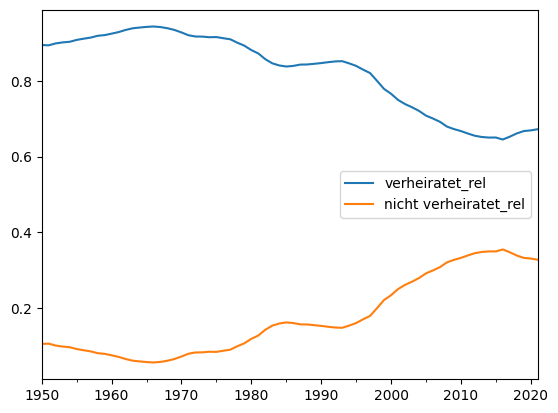

In [68]:
df[['verheiratet_rel', 'nicht verheiratet_rel']].plot()

<AxesSubplot:>

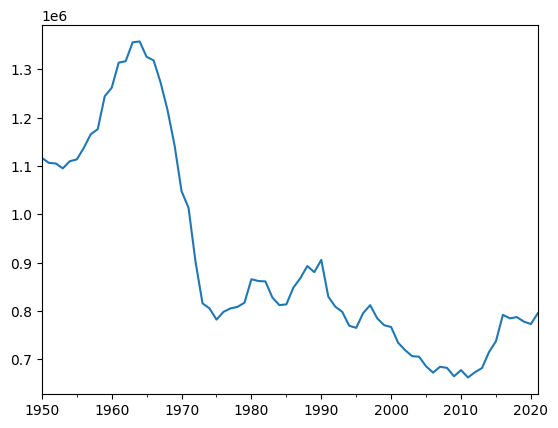

In [72]:
df['total'].plot()

In [80]:
import seaborn as sns

sns.set_style('whitegrid')

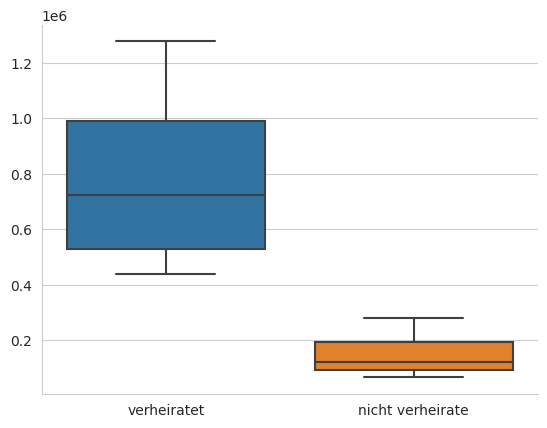

In [82]:
sns.boxplot(data=df[['verheiratet', 'nicht verheirate']])
sns.despine()

## Sterbefälle nach Altersklassen

In [94]:
df_alter = pd.read_csv('data/sterbefälle.csv', delimiter=";", encoding="utf-8", index_col=[0,1])

In [105]:
df_alter.describe()

,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,5360.270627,5545.643564,5401.993399,5514.132013,5786.891089,5612.415842,5800.587459,5907.867987,5744.534653,5992.475248,...,5739.815182,5899.834983,5731.722772,6106.930693,6012.534653,6153.551155,6302.798680,6201.452145,6505.425743,6757.009901
std,6922.771588,7092.966012,6936.728163,7061.484253,7411.980262,7131.590990,7358.085233,7505.062396,7259.930863,7597.493146,...,8033.144168,8283.737373,8001.854001,8571.066617,8378.535332,8635.895844,8847.292814,8722.648288,9248.292863,9588.465107
min,18.000000,21.000000,31.000000,23.000000,33.000000,37.000000,38.000000,41.000000,45.000000,42.000000,...,18.000000,20.000000,14.000000,16.000000,12.000000,18.000000,13.000000,13.000000,14.000000,15.000000
25%,651.500000,693.500000,659.000000,680.000000,699.500000,658.000000,696.500000,664.000000,681.500000,681.500000,...,254.000000,239.000000,230.000000,229.500000,239.500000,222.500000,227.000000,221.500000,217.000000,217.000000
50%,1854.000000,1790.000000,1740.000000,1817.000000,1713.000000,1750.000000,1707.000000,1690.000000,1657.000000,1712.000000,...,1883.000000,1916.000000,1863.000000,1939.000000,1865.000000,1855.000000,1816.000000,1743.000000,1631.000000,1692.000000
75%,8148.500000,8649.000000,8556.000000,8736.000000,9565.500000,9763.500000,10146.500000,10258.500000,9974.000000,10372.000000,...,8239.000000,8431.500000,8096.500000,8906.000000,9043.500000,9099.500000,9228.500000,9133.000000,9663.500000,10418.000000
max,46180.000000,44918.000000,44576.000000,44540.000000,44105.000000,42231.000000,39218.000000,37869.000000,35289.000000,31907.000000,...,33856.000000,35044.000000,34033.000000,36867.000000,35610.000000,36041.000000,37742.000000,38768.000000,42311.000000,43860.000000


In [109]:
df_alter.loc['Insgesamt', '0']

1956    46180
1957    44918
1958    44576
1959    44540
1960    44105
        ...  
2017     2566
2018     2505
2019     2485
2020     2373
2021     2368
Name: (Insgesamt, 0), Length: 66, dtype: int64

<AxesSubplot:>

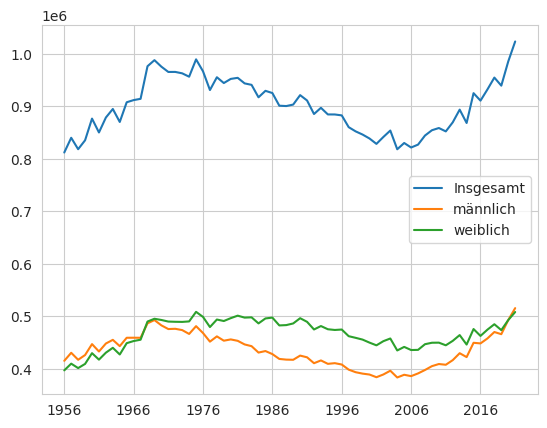

In [117]:
df_alter.groupby(level=0).sum().T.plot()

<AxesSubplot:>

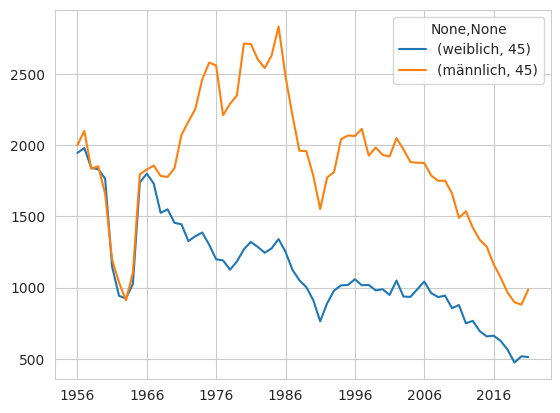

In [138]:
df_alter.loc[(['weiblich', 'männlich'], ['45']),:].T.plot()

In [141]:
df_alter.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 303 entries, ('männlich', '0') to ('Insgesamt', '100')
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1956    303 non-null    int64
 1   1957    303 non-null    int64
 2   1958    303 non-null    int64
 3   1959    303 non-null    int64
 4   1960    303 non-null    int64
 5   1961    303 non-null    int64
 6   1962    303 non-null    int64
 7   1963    303 non-null    int64
 8   1964    303 non-null    int64
 9   1965    303 non-null    int64
 10  1966    303 non-null    int64
 11  1967    303 non-null    int64
 12  1968    303 non-null    int64
 13  1969    303 non-null    int64
 14  1970    303 non-null    int64
 15  1971    303 non-null    int64
 16  1972    303 non-null    int64
 17  1973    303 non-null    int64
 18  1974    303 non-null    int64
 19  1975    303 non-null    int64
 20  1976    303 non-null    int64
 21  1977    303 non-null    int64
 22  1978    303 non-n